# [ PART 03. 통계분석 ] - 6장. 회귀분석

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split    # training/test data set을 추출하는 패키지
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 단순선형회귀분석

### 1. 데이터 파악

In [2]:
# 데이터프레임 생성

df_cars93 = pd.read_csv( 'C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/Cars93.csv',
                         index_col = 'Unnamed: 0' )

x = pd.DataFrame( df_cars93['EngineSize'] )
y = pd.DataFrame( df_cars93['Price'] )
display(x, y)

,EngineSize
1,1.8
2,3.2
3,2.8
4,2.8
5,3.5
...,...
89,2.5
90,2.0
91,2.8
92,2.3


,Price
1,15.9
2,33.9
3,29.1
4,37.7
5,30.0
...,...
89,19.7
90,20.0
91,23.3
92,22.7


### 2. Train set / Test set 나누기

In [3]:
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 2000 )

### 3. 선형회귀 모델 구축
- statsmodels 의 OLS를 사용하여 선형회귀분석 시행 ( OLS : Ordinary Least Squares )
- OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2, ...)를 구하는 방법
- 모델 선언: model = sm.OLS( y데이터, x데이터 )
- 모델 학습: model_trained = model.fit()

#### 3.1. 선형회귀 모델의 가정 확인

In [4]:
x_train = sm.add_constant(x_train)
model = sm.OLS( y_train, x_train, axis = 1 )
model_trained = model.fit()

##### 3.1.1. 확률오차의 정규성 확인

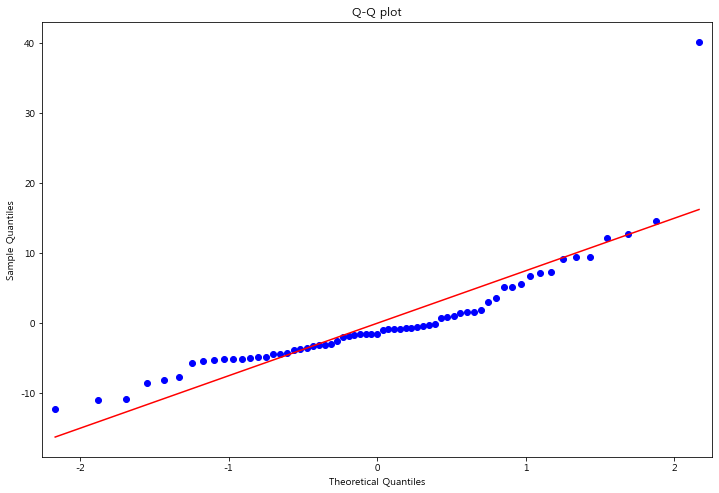

In [5]:
model_residuals = model_trained.resid

plt.rcParams[ 'axes.unicode_minus' ] = False   # 음수 폰트 깨짐을 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line = 's', color = 'blue', ax = ax)
ax.title.set_text('Q-Q plot')

#####  3.1.2. 확률오차의 등분산성 확인

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

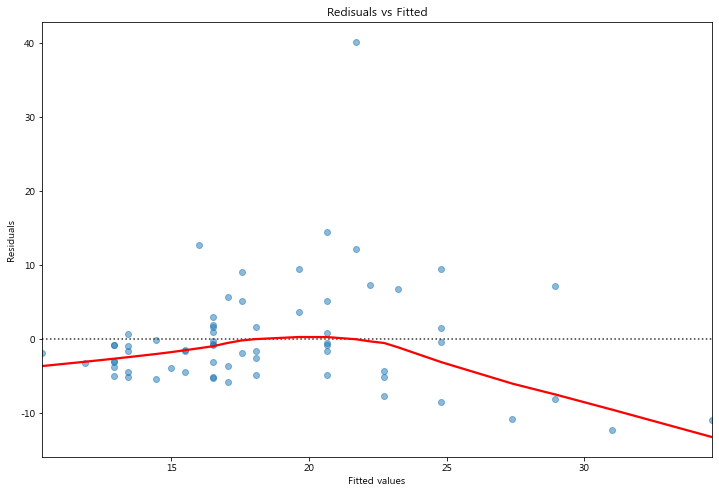

In [6]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sb.residplot( model_fitted_y, y_train,
              data = x_train,
              lowess = True,
              scatter_kws = {'alpha':0.5},
              line_kws = {'color':'red'},
              ax = ax )

ax.title.set_text('Redisuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel = 'Residuals')

#### 3.2. 설명 : 통계적으로 해석
- 모형의 성능 : R-squared (결정계수; coefficient of determination) 
- coef(회귀계수): x가 한 단위 증가할 때 y의 변화량
- P>[t] (p-value): 유의수준 0.05 이하일 때 변수가 유의미

In [7]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     27.14
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.22e-06
Time:                        22:45:55   Log-Likelihood:                -223.19
No. Observations:                  65   AIC:                             450.4
Df Residuals:                      63   BIC:                             454.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1391      2.741      1.875      0.0

#### 3.3. 예측: 미래의 반응변수 값 예측

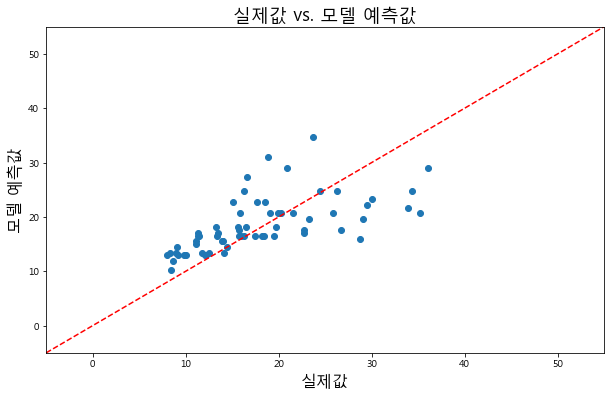

In [8]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (10,6))
plt.title('실제값 vs. 모델 예측값', size = 18)
plt.scatter(y_train, y_train_pred)
plt.plot( [-5,55], [-5,55], ls='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 예측값', size = 16)
plt.xlim(-5,55)
plt.ylim(-5,55)

plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 5 )

x_test = sm.add_constant(x_test)
y_test_pred = model_trained.predict(x_test)

x_test['Price_Pred'] = y_test_pred

x_test

,const,EngineSize,Price_Pred
8,1.0,5.7,34.636230
37,1.0,3.0,20.663898
62,1.0,1.5,12.901491
91,1.0,2.8,19.628910
88,1.0,1.8,14.453972


#####  3.3.1. Mean Squared Error (평균 제곱 오차)

In [10]:
mean_squared_error( y_test, y_test_pred )
print()

#####  3.3.2. Root Mean Squared Error (제곱근 평균 제곱 오차)

In [11]:
np.sqrt( mean_squared_error( y_test, y_test_pred ) )
print()

#####  3.3.3. Mean Absolute Error (평균 절대 오차)

In [12]:
mean_absolute_error( y_test, y_test_pred )
print()

#####  3.3.4. Mean Absolute Percentage Error (평균 절대 백분율 오차)

In [13]:
def mape( y_true, y_pred ):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs( (y_true-y_pred)/y_true ) ) * 100

mape( y_test, y_test_pred )
print()

#####  3.3.5. R-squared

In [14]:
r2_score( y_test, y_test_pred )

0.16309865801558687